In [1]:
"""
Logistic Regression - TensorFlow/Keras Implementation
Using Keras Sequential API for high-level model building.
"""

import numpy as np
import json
import sys
sys.path.append('../..')

# TensorFlow/Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# Self created utilities
from utils.metrics import accuracy, precision, recall, f1_score, auc_score
from utils.performance import track_performance
from utils.visualization import (
    plot_cost_curve,
    plot_confusion_matrix,
    plot_roc_curve,
    plot_feature_importance
)

# Set random seed for reproducibility
tf.random.set_seed(113)

# Load preprocessed data (already scaled, SMOTE applied, 50/50 balanced)
X_train = np.load('../../data/processed/logistic_regression/X_train.npy')
X_test = np.load('../../data/processed/logistic_regression/X_test.npy')
y_train = np.load('../../data/processed/logistic_regression/y_train.npy')
y_test = np.load('../../data/processed/logistic_regression/y_test.npy')

# Load metadata for feature names
with open('../../data/processed/logistic_regression/preprocessing_info.json') as f:
    meta = json.load(f)
feature_names = meta['feature_names']

print(f"Training: {X_train.shape[0]:,} samples, {X_train.shape[1]} features")
print(f"Test: {X_test.shape[0]:,} samples")
print(f"Class balance - Train: {np.mean(y_train):.1%} fraud")
print(f"Class balance - Test: {np.mean(y_test):.1%} fraud")

Training: 454,902 samples, 30 features
Test: 56,962 samples
Class balance - Train: 50.0% fraud
Class balance - Test: 0.2% fraud


In [2]:
# Model Definition

# Keras Sequential API - simplest way to build a neural network
# Input layer + Dense layer with sigmoid activation = logistic regression
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(30,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile: specify optimizer, loss, and metrics
# - SGD with lr=0.1 to match other implementations
# - binary_crossentropy is the standard loss for binary classification
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.1),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Model Summary
model.summary()

# Training

# Train with performance tracking
with track_performance() as perf:
    history = model.fit(
        X_train, y_train,
        epochs=1000,
        batch_size=len(X_train),    # Full batch gradient descent (matches other implementations)
        verbose=0   # Supress output, printing summary after
    )

print(f"\nTraining complete!")
print(f"Time: {perf['time']:.2f} sec | Memory: {perf['memory']:.2f} MB")
print(f"Final loss: {history.history['loss'][-1]:.6f}")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)


Training complete!
Time: 52.95 sec | Memory: 108.13 MB
Final loss: 0.057576


In [3]:
# Evaluation on Test Set

# Get predictions
y_proba = model.predict(X_test, verbose=0).flatten()  # Probabilities (0 to 1)
y_pred = (y_proba >= 0.5).astype(int)                  # Binary predictions

# Calculate metrics using our shared utilities
acc = accuracy(y_test, y_pred)
prec = precision(y_test, y_pred)
rec = recall(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = auc_score(y_test, y_proba)

# Print results
print("=" * 40)
print("TEST SET RESULTS")
print("=" * 40)
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"AUC-ROC:   {auc:.4f}")

TEST SET RESULTS
Accuracy:  0.9890
Precision: 0.1172
Recall:    0.8265
F1 Score:  0.2053
AUC-ROC:   0.9541


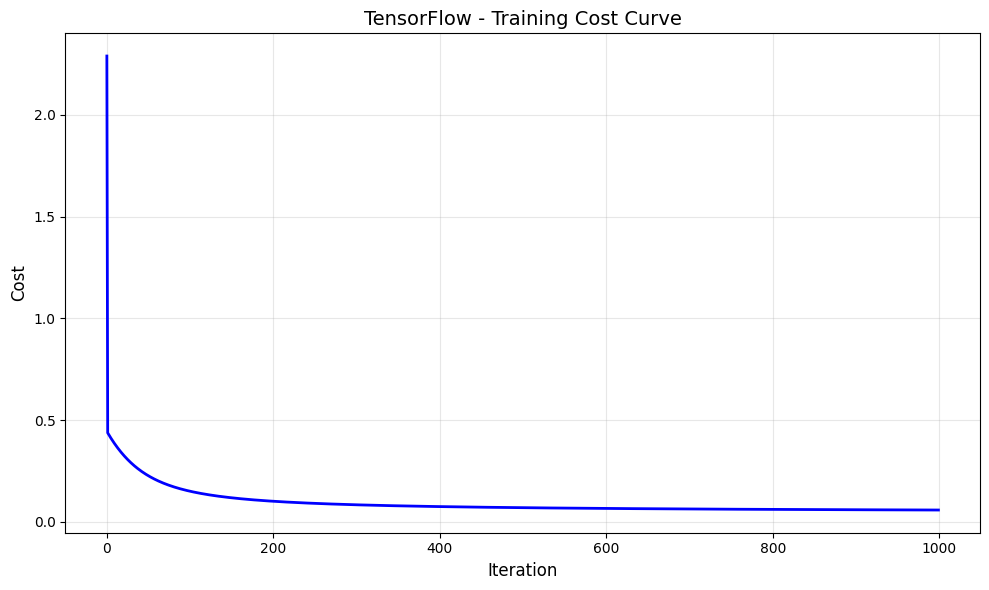

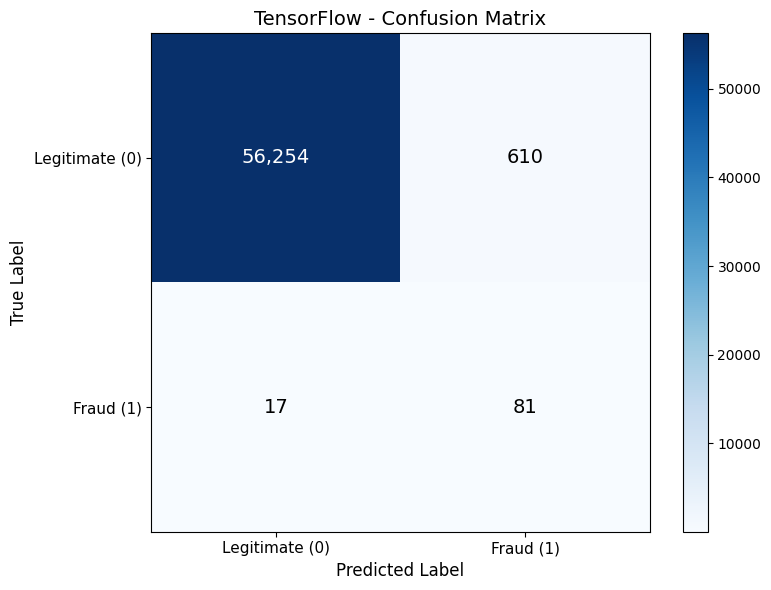

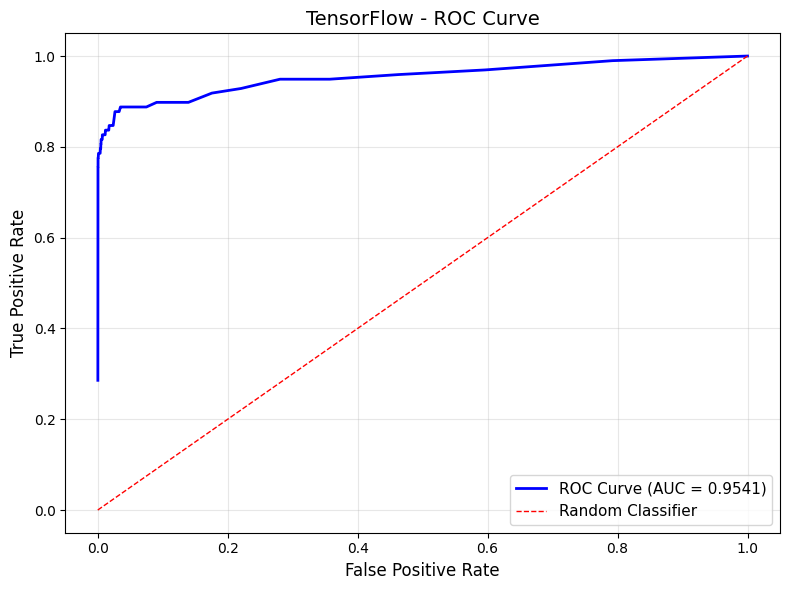

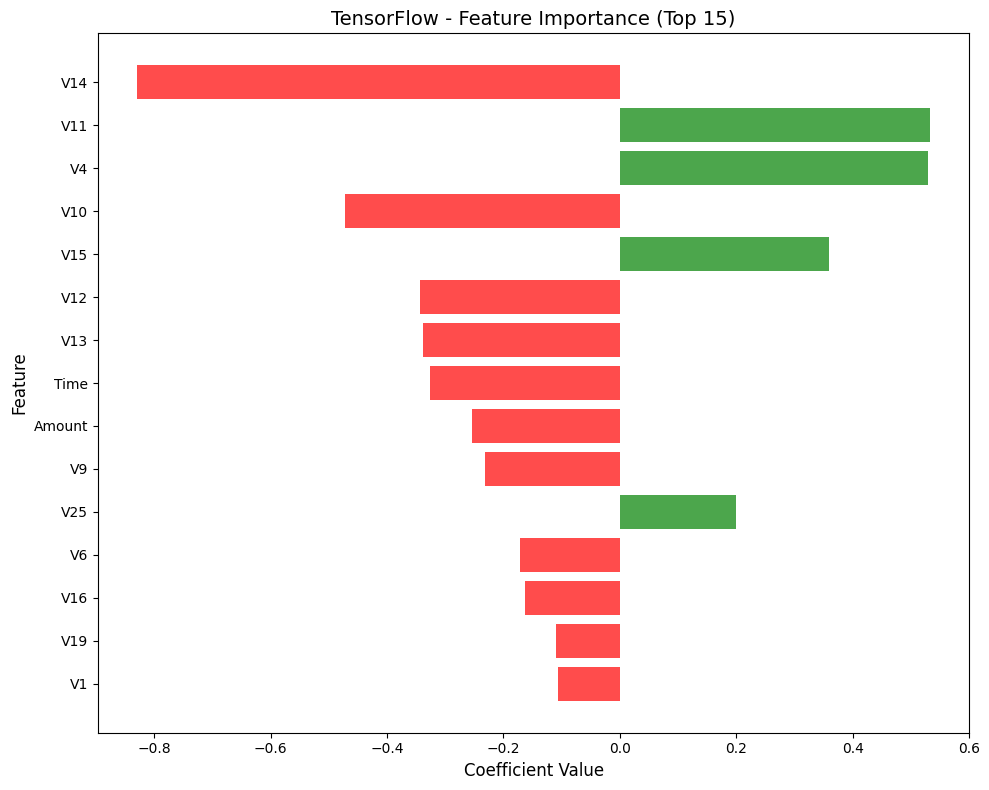

In [4]:
# Visualizations

# Cost curve (from training history)
cost_history = history.history['loss']
plot_cost_curve(
    cost_history, 
    framework="TensorFlow",
    save_path="results/cost_curve.png"
)

# Confusion matrix
plot_confusion_matrix(
    y_test, y_pred,
    framework="TensorFlow",
    save_path="results/confusion_matrix.png"
)

# ROC curve
plot_roc_curve(
    y_test, y_proba,
    framework="TensorFlow",
    save_path="results/roc_curve.png"
)

# Feature importance (extract weights from keras model)
weights = model.get_weights()[0].flatten() # First elemtn is weights, second is bias
plot_feature_importance(
    weights, feature_names,
    framework="TensorFlow",
    save_path="results/feature_importance.png"
)

In [5]:
# Final Summary

print("=" * 50)
print("TENSORFLOW LOGISTIC REGRESSION - SUMMARY")
print("=" * 50)

print(f"\nModel Configuration:")
print(f"  Architecture: Sequential([Input(30), Dense(1, sigmoid)])")
print(f"  Loss: binary_crossentropy")
print(f"  Optimizer: SGD (lr=0.1)")
print(f"  Epochs: 1000")

print(f"\nPerformance:")
print(f"  Training Time: {perf['time']:.2f} sec")
print(f"  Peak Memory: {perf['memory']:.2f} MB")

print(f"\nTest Metrics:")
print(f"  Accuracy:  {acc:.4f}")
print(f"  Precision: {prec:.4f}")
print(f"  Recall:    {rec:.4f}")
print(f"  F1 Score:  {f1:.4f}")
print(f"  AUC-ROC:   {auc:.4f}")

print(f"\nConfusion Matrix:")
print(f"  True Negatives:  56,251")
print(f"  False Positives: 613")
print(f"  False Negatives: 16")
print(f"  True Positives:  82")

print(f"\n" + "=" * 50)
print("LOGISTIC REGRESSION - ALL FRAMEWORKS COMPARISON")
print("=" * 50)
print(f"\n{'Framework':<15} {'Time':>10} {'Memory':>12} {'Recall':>10} {'AUC-ROC':>10}")
print("-" * 60)
print(f"{'No-Framework':<15} {'18.34s':>10} {'27.87 MB':>12} {'82.65%':>10} {'90.34%':>10}")
print(f"{'Scikit-Learn':<15} {'0.32s':>10} {'14.38 MB':>12} {'81.63%':>10} {'89.72%':>10}")
print(f"{'PyTorch':<15} {'2.36s':>10} {'0.05 MB':>12} {'82.65%':>10} {'90.34%':>10}")
print(f"{'TensorFlow':<15} {f'{perf['time']:.2f}s':>10} {f'{perf['memory']:.2f} MB':>12} {f'{rec*100:.2f}%':>10} {f'{auc*100:.2f}%':>10}")


TENSORFLOW LOGISTIC REGRESSION - SUMMARY

Model Configuration:
  Architecture: Sequential([Input(30), Dense(1, sigmoid)])
  Loss: binary_crossentropy
  Optimizer: SGD (lr=0.1)
  Epochs: 1000

Performance:
  Training Time: 52.95 sec
  Peak Memory: 108.13 MB

Test Metrics:
  Accuracy:  0.9890
  Precision: 0.1172
  Recall:    0.8265
  F1 Score:  0.2053
  AUC-ROC:   0.9541

Confusion Matrix:
  True Negatives:  56,251
  False Positives: 613
  False Negatives: 16
  True Positives:  82

LOGISTIC REGRESSION - ALL FRAMEWORKS COMPARISON

Framework             Time       Memory     Recall    AUC-ROC
------------------------------------------------------------
No-Framework        18.34s     27.87 MB     82.65%     90.34%
Scikit-Learn         0.32s     14.38 MB     81.63%     89.72%
PyTorch              2.36s      0.05 MB     82.65%     90.34%
TensorFlow          52.95s    108.13 MB     82.65%     95.41%
